In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import glob

from matplotlib.ticker import MaxNLocator
import matplotlib

generate_plots = True

In [13]:
dataset = "Multi_Atlas"
#dataset = "ON_CT_segmentation_v3"
#df = pd.read_csv("ACCRE/%s_trainset800.csv" %(dataset)) 
df_temp = pd.read_csv("ACCRE/%s_adapt.csv" %(dataset)) 

data = pd.Series(np.loadtxt("ACCRE/"+dataset+".out", delimiter=' '))
print(dataset, len(data))
df_temp[df_temp.Function == "Optimal"].head(1)

Multi_Atlas 17416


,Unnamed: 0,Function,Parameters,Cost,Trainset
1,1,Optimal,400.0,125274.0,10


In [14]:
df_temp[df_temp.Trainset=="20"].head()

,Unnamed: 0,Function,Parameters,Cost,Trainset


In [15]:
def get_min_data(df_temp, factor):
    df = pd.DataFrame(columns = ["Function", "Cost", "Trainset"])
    continuous = []
    i=0
    for entry in df_temp.values.tolist():
        if math.isnan(entry[0]):
            continue
        if entry[1] == "Discreet":
            if len(continuous) > 0:
                df.loc[len(df)] = ["Continuous", min(continuous)/factor, current_set]
                continuous = []
            current_set = int(entry[4])
            df.loc[len(df)] = ["Discreet", float(entry[3])/factor, current_set]
            continue

        if entry[1] == "Optimal":
            df.loc[len(df)] = ["Optimal", float(entry[3])/factor, current_set]
            continue

        continuous.append(float(entry[3]))

    if len(continuous) > 0:
        df.loc[len(df)] = ["Continuous", min(continuous)/factor, current_set]
    return df
    
df = get_min_data(df_temp, 1)
df.head(6)

,Function,Cost,Trainset
0,Discreet,125274.000,10
1,Optimal,125274.000,10
2,Continuous,125274.000,10
3,Discreet,144459.895,20
4,Optimal,144459.895,20
5,Continuous,120459.000,20


In [16]:
df_temp[(df_temp.Function=="Optimal") & (df_temp.Trainset==80)]

,Unnamed: 0,Function,Parameters,Cost,Trainset
29,29,Optimal,400.0,679997.814,80


In [17]:
df_optimal = df[df.Function=="Optimal"]
df_discreet = df[df.Function=="Discreet"]
df_funct = df[df.Function=="Continuous"]
#df_temp = df[(df.Function!="Optimal") & (df.Function!="Discreet")]
#df_funct = df_temp.loc[df_temp.groupby("Trainset")["Cost"].idxmin()]
#df_temp

Text(0, 0.5, 'Cost')

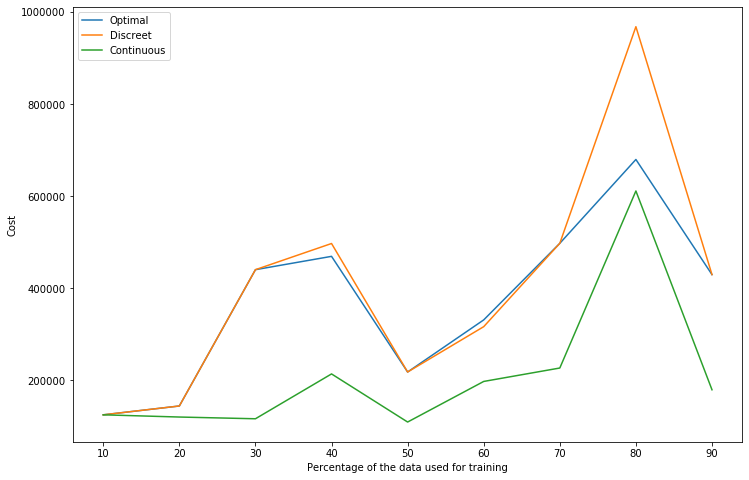

In [18]:
# plot the cost for different polynomial orders
plt.figure(figsize=(12,8))
ax = sns.lineplot(x="Trainset", y="Cost", data=df_optimal, label="Optimal")
ax = sns.lineplot(x="Trainset", y="Cost", data=df_discreet, label="Discreet")
ax = sns.lineplot(x="Trainset", y="Cost", data=df_funct, label="Continuous")
ax.set_xlabel('Percentage of the data used for training')
ax.set_ylabel('Cost')

In [ ]:
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5)
#plt.plot(x, func(x, *popt), 'g--')
ax.set_xlim(min(data), max(data))
ax.set_xlabel('Walltime')
ax.set_ylabel('Frequency')

for ts_step in [5,10,100]:
    plt.figure(figsize=(12,8))
    ax = data[:int(len(data)/ts_step)].plot(kind='hist', bins=50, density=True, alpha=0.5)
    #plt.plot(x, func(x, *popt), 'g--')
    ax.set_xlim(min(data), max(data))
    ax.set_xlabel('Walltime')
    ax.set_ylabel('Frequency')

fMRIQA_v3
dtiQA_v2
dtiQA_v3
fMRIQA
fMRIQA_v2
Generic_FMRI_v1
Multi_Atlas
ON_CT_segmentation_v3
VBMQA


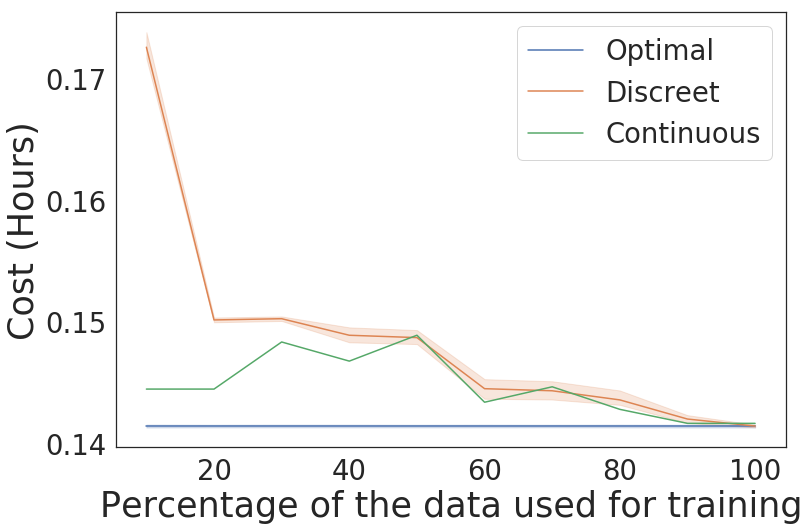

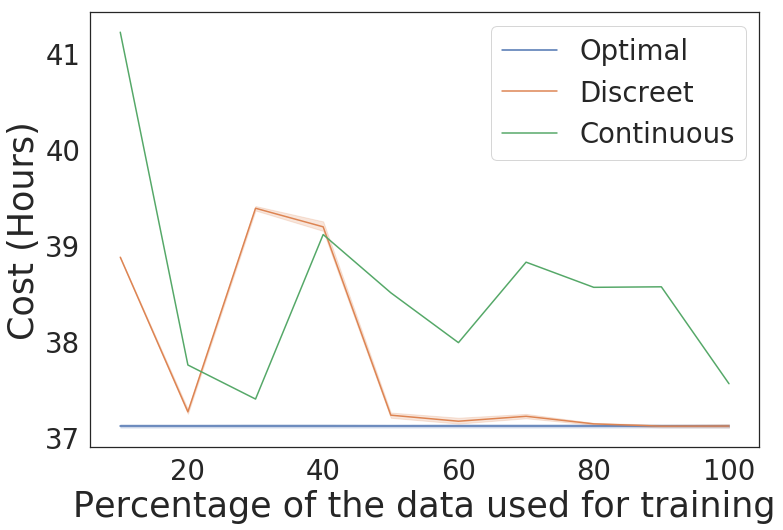

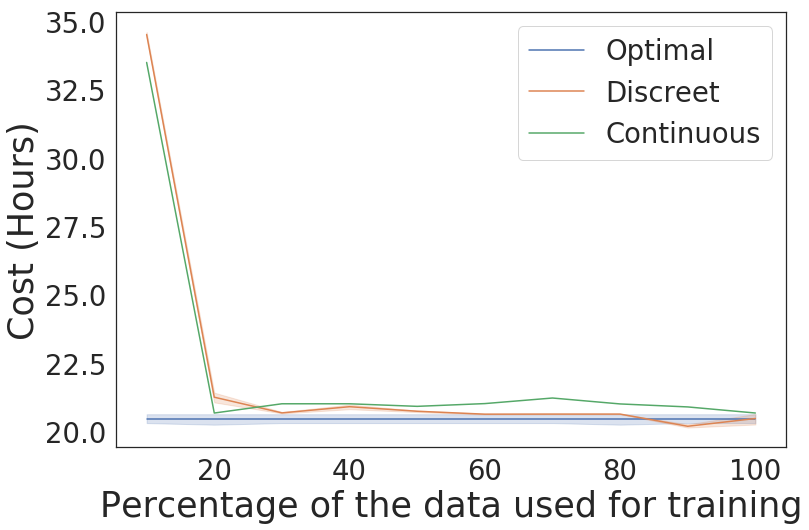

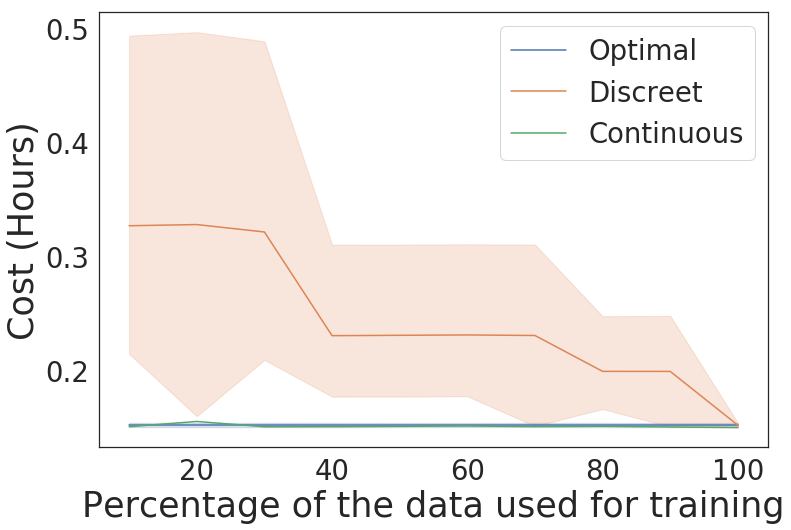

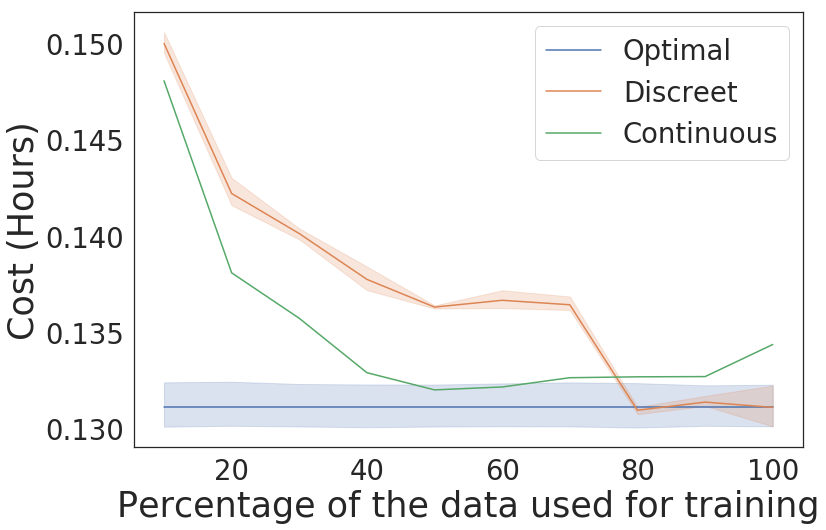

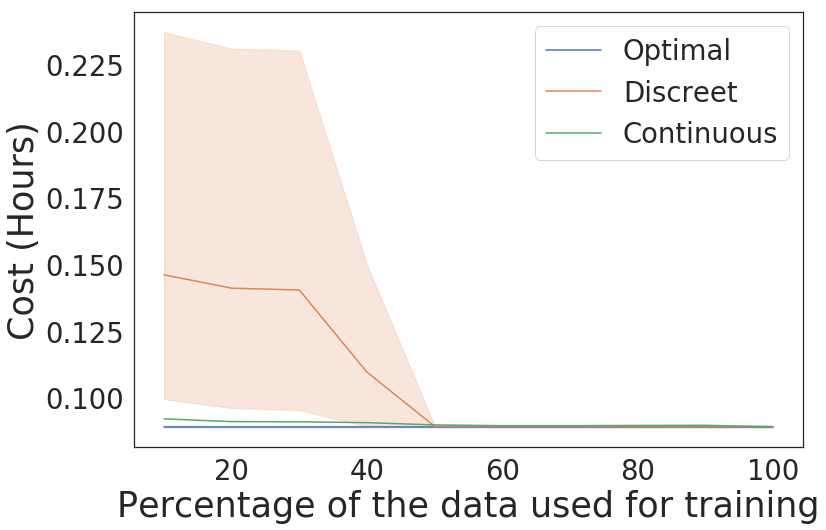

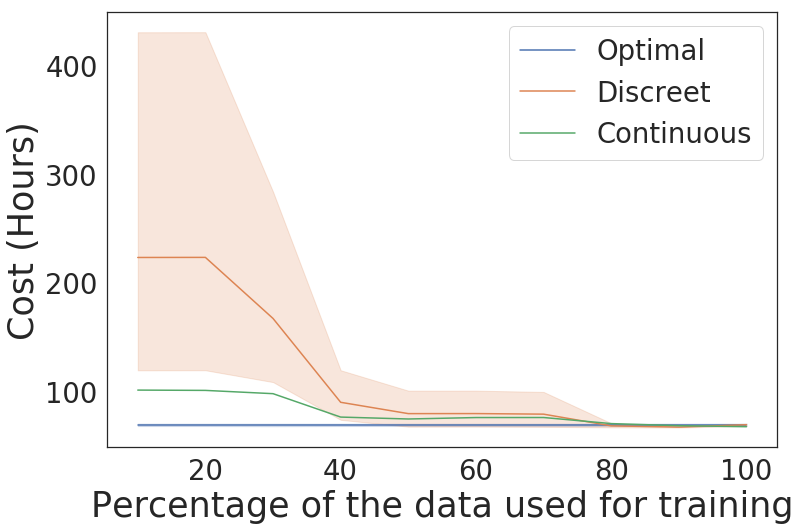

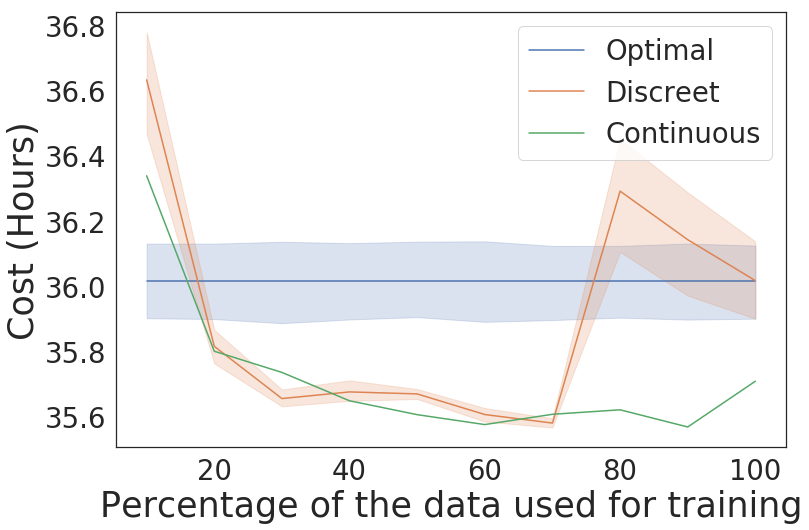

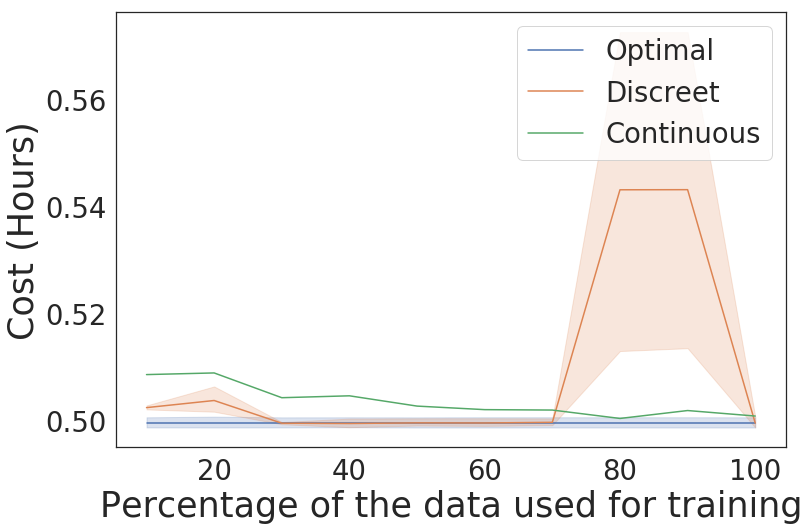

In [9]:
if generate_plots:
    i=0
    for path in glob.glob("ACCRE/*.csv"):
        dataset = path.split("/")[1]
        dataset = dataset[:-4]
        try:
            df = pd.read_csv("ACCRE/"+dataset+"_trainset_10perc.csv") 
            #df = pd.read_csv("ACCRE/"+dataset+"_adapt.csv")
        except:
            continue
        print(dataset)
        #if dataset == "Multi_Atlas":
        df = get_min_data(df, 3600)

        df_optimal = df[df.Function=="Optimal"]
        df_discreet = df[df.Function=="Discreet"]
        df_funct = df[(df.Function!="Optimal") & (df.Function!="Discreet")]
        df_funct = df_funct.loc[df_funct.groupby("Trainset")["Cost"].idxmin()]
        
        plt.figure(figsize=(12,8))
        sns.set(font_scale=2.5)
        sns.set_style("white")
        ax = sns.lineplot(x="Trainset", y="Cost", data=df_optimal, label="Optimal")
        ax = sns.lineplot(x="Trainset", y="Cost", data=df_discreet, label="Discreet")
        ax = sns.lineplot(x="Trainset", y="Cost", data=df_funct, label="Continuous")
        ax.set_xlabel('Percentage of the data used for training',fontsize=35)
        ax.set_ylabel('Cost (Hours)',fontsize=35)
        
        data = pd.Series(np.loadtxt("ACCRE/"+dataset+".out", delimiter=' '))
        #ax.set_title('%s (%d elements)' %(dataset, len(data)))
        plt.savefig("figures_ACCRE/training_set/%s_ts.png" %(dataset))
        
        i+=1
        #if i==3:
        #    break